# Домашнее задание "Теория вероятности. Дискретные Случайные Величины".

## Уровень 0:

### Задание 1:

Монетку подбрасывают 15 раз, найдите вероятность выпадения простого числа орлов

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def bernoulli_probability(p:'0=<float=<1', m:'int>=0', n:'int>=0'):
    """Поиск вероятности события по формуле Бернулли
    
    Формула Бернулли находит вероятность появления события А ровно m раз в n независимых испытаниях.
    
    Параметры
    ---------
    p : float
      Вероятность появления события А
    m : int
      Число появления события A в n независимых испытаниях
    n : int 
      Число проводимых опытов
      
    Результат
    ---------
    pa : float
      Вероятность появления события A в n независимых испытаниях
    """
    
    if p > 1 or p < 0:
        raise ValueError("Вероятность p должна быть в промежутке от 0 до 1 включительно")
        
    if not isinstance(m, int) or m < 0:
        raise ValueError("Количество появлений m события А должно быть целым числом и больше или равно 0")
        
    if not isinstance(n, int) or m < 0:
        raise ValueError("Количество испытаний n должно быть целым числом и больше или равно 0")
        
    q = 1 - p
    
    return math.factorial(n) / (math.factorial(n-m) * math.factorial(m)) * p**m * q**(n-m)

In [3]:
# Вероятность выпадания орла
p = 1/2
# Кол-во опытов
n = 15

for m in (2,3,5,7,11,13):
    print(f'Вероятность выпадение орла {m} раз(а), кол-во опытов {n}: {bernoulli_probability(p, m, n)}')

Вероятность выпадение орла 2 раз(а), кол-во опытов 15: 0.003204345703125
Вероятность выпадение орла 3 раз(а), кол-во опытов 15: 0.013885498046875
Вероятность выпадение орла 5 раз(а), кол-во опытов 15: 0.091644287109375
Вероятность выпадение орла 7 раз(а), кол-во опытов 15: 0.196380615234375
Вероятность выпадение орла 11 раз(а), кол-во опытов 15: 0.041656494140625
Вероятность выпадение орла 13 раз(а), кол-во опытов 15: 0.003204345703125


### Задание 2:

Создайте свою дискретную случайную величину с не менее чем 10 значениями. Просемплируйте 1000 случайных значений, постройте гистограмму плотности распределения по выборке, посчитайте среднее, дисперсию и медиану.

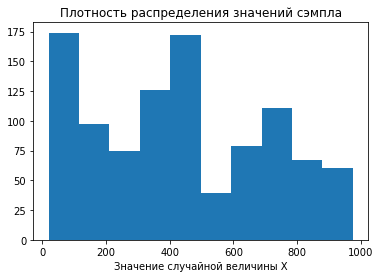

Среднее значение случайной величины X в сэмпле: 438.477
Дисперсия случайной величины X в сэмпле: 77922.997471
СКО случайной величины X в сэмпле: 279.14691019425595
Медиана случайной величины X в сэмпле: 413.0


In [4]:
rand = np.random.RandomState(seed=42)
x = rand.randint(0, 1000, 50)
sample = rand.choice(x, size=1000, replace=True)

plt.hist(sample)
plt.title('Плотность распределения значений сэмпла')
plt.xlabel('Значение случайной величины X')
plt.show()

print('Среднее значение случайной величины X в сэмпле:', np.mean(sample))
print('Дисперсия случайной величины X в сэмпле:', np.var(sample))
print('СКО случайной величины X в сэмпле:', np.std(sample))
print('Медиана случайной величины X в сэмпле:', np.median(sample))

## Уровень 1:

### Задание 3:

Пусть брошены 3 уравновешенные монеты.

Рассмотрим 3 события:

A1 - монеты 1 и 2 упали одной и той же стороной;

A2 - монеты 2 и 3 упали одной и той же стороной;

A3 - монеты 1 и 3 упали одной и той же стороной.

Покажите, почему эти 3 события (A1, A2, A3) являются попарно независимыми, но не являются независимыми в совокупности.

#### Решение:

Для события А количество благоприятствующих значений равно 4. Общее количество комбинаций равно $\overline{A}^3_2 = 2^3 = 8$.
Соответственно вероятность $P(A1) = 4/8 = 1/2$

Аналогично $P(A2) = 1/2$ и $P(A3) = 1/2$

Если предполагаем пересечение событий A1 и A2, то это означает, что у нас на всех монетах выпадут одинаковые стороны. Число благоприятствующих комбинаций равно 2, а общее количество комбинаций равно 8.

Тогда вероятность $P(A1A2) = 2/8 = 1/4$, а $P(A1)*P(A2) = 1/2 * 1/2 = 1/4$.
Так как $P(A1A2) = P(A1)*P(A2)$, то эта пара событий независима.

Расчеты будут аналогичны для пар A1 и A3, A2 и A3. Отсюда следует, что события A1, A2 и A3 попарно независимы.

Если предполагаем пересечение событий A1, A2 и A3, то точно так же это означает выпадение одной стороны на всех монетах.

Тогда $P(A1A2A3) = 2/8 = 1/4$, а $P(A1)*P(A2)*P(A3) = 1/2 * 1/2 * 1/2 = 1/8$.

Так как $P(A1A2A3) \neq P(A1)*P(A2)*P(A3)$, то делаем вывод о зависимости в совокупности событий A1, A2 и A3,

### Задание 4 (формула полной вероятности):

В магазин привезли устройства с 3-х разных предприятий.

Соотношение устройств следующее: 20% - продукция первого предприятия, 30% - продукция второго предприятия, 50% - продукция третьего предприятия; далее, 10% продукции первого предприятия высшего сорта, на втором предприятии - 5% и на третьем - 20% продукции высшего сорта.

Найти вероятность того, что случайно купленная новая продукция окажется высшего сорта.

H1 - Продукция из первого предприятия

H2 - Продукция из второго предприятия

H3 - Продукция из третьего предприятия

In [5]:
# Вероятность поступления продукции с первого завода
p_h1 = 0.2
# Вероятность поступления продукции со второго завода
p_h2 = 0.3
# Вероятность поступления продукции с третьего завода
p_h3 = 0.5

assert p_h1 + p_h2 + p_h3 == 1, "Сумма гипотез не равна 1"

# Вероятность получения качественной продукции, если она пришла с первого завода
p_h1_a = 0.1
# Вероятность получения качественной продукции, если она пришла со второго завода
p_h2_a = 0.05
# Вероятность получения качественной продукции, если она пришла с третьего завода
p_h3_a = 0.2

p_a = p_h1*p_h1_a + p_h2*p_h2_a + p_h3*p_h3_a
print("Вероятность того, что случайно купленная новая продукция окажется высшего сорта:", p_a)

Вероятность того, что случайно купленная новая продукция окажется высшего сорта: 0.135
